In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
import numpy as np

n = 2
m = 50
U = np.array([[1.824183228637652032e+00, 1.349093690455489103e+00, 6.966316403935147727e-01, 7.599387854623529392e-01, 2.388321695850912363e+00, 8.651370608981923116e-01, 1.863922545015865406e+00, 7.099743941474848663e-01, 6.005484882320809570e-01, 4.561429569892232472e-01, 5.328296545713475663e-01, 2.138547819234526415e+00, 1.906676474276197464e+00, 1.015547309536922516e+00, 8.765948388006337133e-01, 1.648147347399247842e+00, 1.027902202451572045e+00, 2.145586297520478691e+00, 1.793440421753045744e+00, 1.020535583041398908e+00, 8.977911075271942654e-01, 1.530480229262339398e+00, 2.478088034137528872e-01, 2.617415807793897820e+00, 2.081978553098443374e+00, 1.891226687205936452e+00, 8.222497927065576251e-01, 5.803514604868882376e-01, 1.158670193449639063e+00, 6.016685032455900695e-01, 5.605410828151705660e-01, 2.508815467550573164e+00, 2.230201413385580977e+00, 1.170848897912992514e+00, 2.256355929901105561e+00, 6.686991510936428629e-01, 2.040269595792217672e+00, 3.634166812924328749e-01, 5.418647611079159265e-01, 6.631470058399455692e-01, 4.286142597532469622e-01, 2.155925078996823618e+00, 2.379380016960549682e+00, 6.343212414048013947e-01, 1.469076407947448981e+00, 1.225322035289937439e+00, 1.467602887401966871e+00, 9.345319187253748883e-01, 1.985592768641736505e+00, 2.106896115090134636e+00],
[-9.644136284187876385e-01, 1.069547315003422927e+00, 6.733229334437943470e-01, 7.788072961810316164e-01, -9.467465278344706636e-01, -8.591303443863639311e-01, 1.279527420871080956e+00, 5.314829019311283487e-01, 6.975676079749143499e-02, -4.641873429414754559e-01, -2.094571396598311763e-01, -8.003479827938377866e-01, 6.135280782546607137e-01, -9.961307468791747999e-01, -8.765215480412106297e-01, 9.655406812422813179e-01, 1.011230180540185541e+00, 6.105416770440197372e-01, 9.486552370654932620e-01, -9.863592657836954825e-01, 7.695327845100754516e-01, -1.060072365810699413e+00, -4.041043465424410952e-01, -2.352952920283236105e-01, 7.560391050507236921e-01, -9.454246095204003053e-01, -5.303145312191936966e-01, 5.979590038743245461e-01, -1.154309511133019717e+00, -6.123184171955468047e-01, -1.464683782538583889e-01, -1.839128688968104386e-01, 4.250070477845909744e-01, 8.861864983476224200e-01, 3.927648421593328276e-01, -6.726102374256350824e-01, -1.047252884197514833e+00, 1.825096825995130845e-01, -4.482373962742914886e-01, 5.115625649313135792e-01, 7.846201103116770548e-02, 6.006325432819290544e-01, -5.710733714464664157e-01, 4.725559971890586075e-01, -8.440290321502940118e-01, -1.003920890712479475e+00, -1.067089412136528637e+00, 7.909281966910661765e-01, -1.059509163675931065e+00, -7.136351632325785843e-01]
])

center:[ 1.47590677 -0.04404696], r:1.0342165444281546


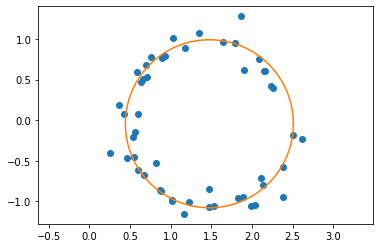

In [66]:
ux = U[0].reshape(-1, 1)
uy = U[1].reshape(-1, 1)
data = np.hstack([ux, uy])

A = np.zeros((m, 3))
A[:, 0:2] = 2 * data
A[:, 2] = 1

b = np.linalg.norm(U, axis=0)**2 

x = np.linalg.inv(A.T @ A) @ A.T @ b
c = x[0:2]
t = x[2]
r = np.sqrt(c.T @ c + t)

# Create an array of angles from 0 to 2*pi
angles = np.linspace(0, 2*np.pi, 1000)

# Calculate the x and y coordinates of the circle using the center and radius
x = c[0] + r*np.cos(angles)
y = c[1] + r*np.sin(angles)

# Plot the circle using the x and y coordinates
plt.plot(ux, uy, 'o')
plt.plot(x, y)
plt.axis('equal')

print(f"center:{c}, r:{r}")